In [17]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [18]:
#load data

polls = pd.read_csv("polls_btw.csv", index_col='date', parse_dates=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,NaN,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,NaN,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,NaN,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,906.0


## Exploratory Data Analysis

In [212]:
#Impute sample_size with 1000 for missing values

polls["sample_size"].fillna(1000, inplace=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,1000.0,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,1000.0,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,1000.0,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,906.0


In [213]:
#see how many unique polling institutions there are

polls['institute'].unique()

array(['allensbach', 'fgruppe_wahlen', 'forsa', 'emnid',
       'infratest_dimap', 'gms', 'insa'], dtype=object)

In [214]:
#see how many unique parties there are in the polls

polls['party'].unique()

array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

In [215]:
#create data frame with polls from each institutions in 2017 

election2017_allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017_insa = polls.loc[(polls['institute'] == 'insa') & (polls['election'] == 2017)]
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]

In [24]:
#check out institution allensbach: 

election2017_allen.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
2015-06-18,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,829.0
2016-08-24,2017.0,1496.0,allensbach,spd,23.0,2017-09-24,396.0
2015-08-19,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,767.0
2015-02-19,2017.0,1400.0,allensbach,spd,25.5,2017-09-24,948.0
2017-07-18,2017.0,1403.0,allensbach,spd,25.0,2017-09-24,68.0


In [47]:
#create allensbach's polls for AFD in 2017 election:

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
#plot_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd)

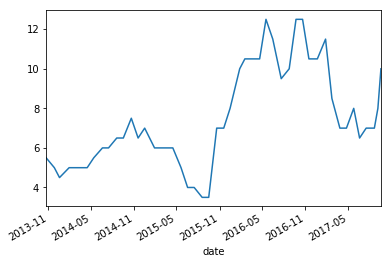

In [48]:
#plot allensbach's polls for AFD in 2017 election:
#election2017allen_afd['date'] = election2017allen_afd.index
#melted_df = pd.melt(election2017allen_afd, id_vars='date', value_name='support')
#plot_allen_afd = sns.tsplot(melted_df, time='date', value='support')
election2017_allen_afd.support['2013-10-23':'2017-09-19'].plot()
plt.show()
plt.clf()

In [49]:
upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first()

In [174]:
print(upsampled_election2017_allen_afd.head(32))

date
2013-10-23    5.5
2013-10-24    NaN
2013-10-25    NaN
2013-10-26    NaN
2013-10-27    NaN
2013-10-28    NaN
2013-10-29    NaN
2013-10-30    NaN
2013-10-31    NaN
2013-11-01    NaN
2013-11-02    NaN
2013-11-03    NaN
2013-11-04    NaN
2013-11-05    NaN
2013-11-06    NaN
2013-11-07    NaN
2013-11-08    NaN
2013-11-09    NaN
2013-11-10    NaN
2013-11-11    NaN
2013-11-12    NaN
2013-11-13    NaN
2013-11-14    NaN
2013-11-15    NaN
2013-11-16    NaN
2013-11-17    NaN
2013-11-18    NaN
2013-11-19    NaN
2013-11-20    NaN
2013-11-21    NaN
2013-11-22    NaN
2013-11-23    NaN
Freq: D, Name: support, dtype: float64


In [51]:
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd.head()

date
2013-10-23    5.500000
2013-10-24    5.485714
2013-10-25    5.471429
2013-10-26    5.457143
2013-10-27    5.442857
Freq: D, Name: support, dtype: float64

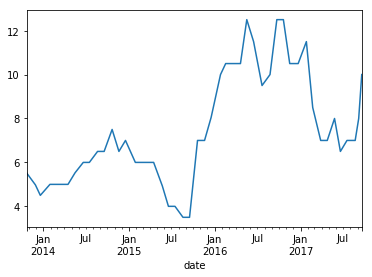

In [52]:
interpolated_election2017_allen_afd.plot()
plt.show()
plt.clf()

## Data transformation of time-series 



#### AFD

In [194]:
#Create dataframe for AFD voteshares polls by each of the 7 institutions

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
election2017_insa_afd = election2017_insa.loc[election2017_insa['party'] == 'afd']
election2017_forsa_afd = election2017_forsa.loc[election2017_forsa['party'] == 'afd']
election2017_emnid_afd = election2017_emnid.loc[election2017_emnid['party'] == 'afd']
election2017_gms_afd = election2017_gms.loc[election2017_gms['party'] == 'afd']
election2017_infra_afd = election2017_infra.loc[election2017_infra['party'] == 'afd']
election2017_fgruppe_afd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'afd']

In [195]:
#Create upsampled and interpolated data for Allen in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd = interpolated_election2017_allen_afd.reindex(t_index_final)
interpolated_election2017_insa_afd.tail()

2017-09-17    11.0
2017-09-18    11.0
2017-09-19    11.0
2017-09-20    11.0
2017-09-21    11.0
Freq: D, Name: support, dtype: float64

In [196]:
#Create upsampled and interpolated data for Insa in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_afd = election2017_insa_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_insa_afd = upsampled_election2017_insa_afd.interpolate(how='linear')
interpolated_election2017_insa_afd = interpolated_election2017_insa_afd.reindex(t_index_final)
interpolated_election2017_insa_afd.tail()

2017-09-17    11.0
2017-09-18    11.0
2017-09-19    11.0
2017-09-20    11.0
2017-09-21    11.0
Freq: D, Name: support, dtype: float64

In [197]:
#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_afd = election2017_forsa_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_forsa_afd = upsampled_election2017_forsa_afd.interpolate(how='linear')
interpolated_election2017_forsa_afd = interpolated_election2017_forsa_afd.reindex(t_index_final)
interpolated_election2017_forsa_afd.tail()

2017-09-17    9.0
2017-09-18    9.0
2017-09-19    9.0
2017-09-20    9.0
2017-09-21    9.0
Freq: D, Name: support, dtype: float64

In [198]:
#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_afd = election2017_emnid_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_emnid_afd = upsampled_election2017_emnid_afd.interpolate(how='linear')
interpolated_election2017_emnid_afd = interpolated_election2017_emnid_afd.reindex(t_index_final)
interpolated_election2017_emnid_afd.tail()

2017-09-17    11.0
2017-09-18    11.0
2017-09-19    11.0
2017-09-20    11.0
2017-09-21    11.0
Freq: D, Name: support, dtype: float64

In [199]:
#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_afd = election2017_gms_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_gms_afd = upsampled_election2017_gms_afd.interpolate(how='linear')
interpolated_election2017_gms_afd = interpolated_election2017_gms_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

2017-09-17     9.428571
2017-09-18     9.571429
2017-09-19     9.714286
2017-09-20     9.857143
2017-09-21    10.000000
Freq: D, Name: support, dtype: float64

In [200]:
#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_afd = election2017_infra_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_infra_afd = upsampled_election2017_infra_afd.interpolate(how='linear')
interpolated_election2017_infra_afd = interpolated_election2017_infra_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

2017-09-17     9.428571
2017-09-18     9.571429
2017-09-19     9.714286
2017-09-20     9.857143
2017-09-21    10.000000
Freq: D, Name: support, dtype: float64

In [201]:
#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_afd = election2017_fgruppe_afd['support'].resample('D').first().reindex(t_index1)
interpolated_election2017_fgruppe_afd = upsampled_election2017_fgruppe_afd.interpolate(how='linear')
interpolated_election2017_fgruppe_afd = interpolated_election2017_fgruppe_afd.reindex(t_index_final)
interpolated_election2017_fgruppe_afd.tail()

2017-09-17    10.333333
2017-09-18    10.500000
2017-09-19    10.666667
2017-09-20    10.833333
2017-09-21    11.000000
Freq: D, Name: support, dtype: float64

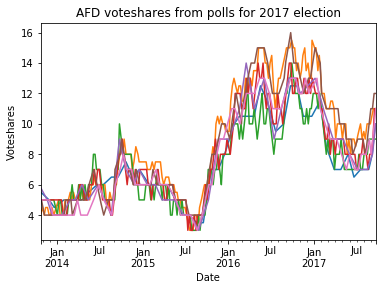

In [202]:
interpolated_election2017_allen_afd.plot()
interpolated_election2017_insa_afd.plot()
interpolated_election2017_forsa_afd.plot()
interpolated_election2017_emnid_afd.plot()
interpolated_election2017_gms_afd.plot()
interpolated_election2017_infra_afd.plot()
interpolated_election2017_fgruppe_afd.plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD voteshares from polls for 2017 election")
plt.show()
plt.clf()

In [210]:
#Create new dataframe with all new time-series from 7 institutions

frames_afd = [interpolated_election2017_allen_afd, interpolated_election2017_insa_afd, 
         interpolated_election2017_forsa_afd, interpolated_election2017_emnid_afd,
         interpolated_election2017_gms_afd, interpolated_election2017_infra_afd, 
         interpolated_election2017_fgruppe_afd]

result_afd = pd.concat(frames_afd, axis=1)
final_result_afd = result_afd.T
final_result_afd.head()

,2013-10-23 00:00:00,2013-10-24 00:00:00,2013-10-25 00:00:00,2013-10-26 00:00:00,2013-10-27 00:00:00,2013-10-28 00:00:00,2013-10-29 00:00:00,2013-10-30 00:00:00,2013-10-31 00:00:00,2013-11-01 00:00:00,...,2017-09-12 00:00:00,2017-09-13 00:00:00,2017-09-14 00:00:00,2017-09-15 00:00:00,2017-09-16 00:00:00,2017-09-17 00:00:00,2017-09-18 00:00:00,2017-09-19 00:00:00,2017-09-20 00:00:00,2017-09-21 00:00:00
support,5.500000,5.485714,5.471429,5.457143,5.442857,5.428571,5.414286,5.400000,5.385714,5.371429,...,8.923077,9.076923,9.230769,9.384615,9.538462,9.692308,9.846154,10.000000,10.000000,10.0
support,4.111111,4.166667,4.222222,4.277778,4.333333,4.388889,4.444444,4.500000,4.428571,4.357143,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
support,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
support,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,9.857143,10.142857,10.428571,10.714286,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
support,5.771429,5.742857,5.714286,5.685714,5.657143,5.628571,5.600000,5.571429,5.542857,5.514286,...,8.714286,8.857143,9.000000,9.142857,9.285714,9.428571,9.571429,9.714286,9.857143,10.0


## MODELLING FOR AFD

In [ ]:
#import libraries 

import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor